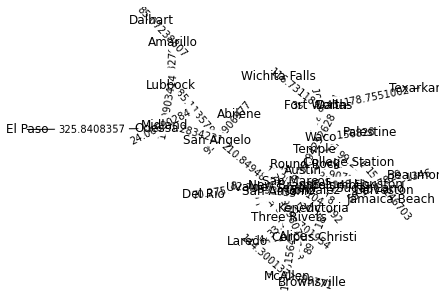

In [12]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
from collections import deque

simple_texas_graph = {}
city_location_dict = {}
texas_graph = nx.Graph()

with open('nodes_new.csv') as csv_file:
    nodes = csv.reader(csv_file, delimiter=',')
    for node in nodes:
        texas_graph.add_node(node[0], pos=(float(node[1]), float(node[2])))
        city_location_dict[node[0]] = [float(node[1]), float(node[2])]
        simple_texas_graph[node[0]] = []
with open('mappings.csv') as csv_file:
    edges = csv.reader(csv_file, delimiter=',')
    for edge in edges:
        texas_graph.add_edge(edge[0], edge[1], weight=float(edge[2]))
        temp = [edge[1], float(edge[2])]
        temp1 = [edge[0], float(edge[2])]
        simple_texas_graph[edge[0]].append(temp)
        simple_texas_graph[edge[1]].append(temp1)
pos = {city: (long, lat) for (city, (lat, long)) in nx.get_node_attributes(texas_graph, 'pos').items()}
nx.draw(texas_graph, pos=pos, with_labels=True, node_size=0)
labels = nx.get_edge_attributes(texas_graph, 'weight')
nx.draw_networkx_edge_labels(texas_graph, pos=pos, edge_labels=labels)
plt.axis('off')
plt.show()

In [ ]:
print("Using a breadth first approach to visit every node and going to the closest city first to determine\n")
print("the path the virus will take to spread through out Texas")

In [13]:
def breadth_first_search(graph, source):
    queue = deque([source])
    visited = {source: True}
    while queue:
        city = queue.popleft()
        #Printing the city that is currently being visited
        print("Visiting: " + city, end=", ")
        for next_city in graph[city]:
            if next_city[0] not in visited:
                queue.append(next_city[0])
                visited[next_city[0]] = True

#Sorting the neighbors of current node by smallest weight to visit closest city by weight next
def sort(city_list):
    length = len(city_list)
    for i in range(0, length):
        for j in range(0, length - i - 1):
            if city_list[j][1] > city_list[j + 1][1]:
                temp_city = city_list[j]
                city_list[j] = city_list[j + 1]
                city_list[j + 1] = temp_city
    return city_list


for city in simple_texas_graph:
    simple_texas_graph[city] = sort(simple_texas_graph[city])
breadth_first_search(simple_texas_graph, 'Three Rivers')

Visiting: Three Rivers, Visiting: Kenedy, Visiting: Alice, Visiting: San Antonio, Visiting: Corpus Christi, Visiting: Laredo, Visiting: McAllen, Visiting: New Braunfels, Visiting: Seguin, Visiting: Uvalde, Visiting: San Angelo, Visiting: Victoria, Visiting: Brownsville, Visiting: San Marcos, Visiting: Gonzalez, Visiting: Columbus, Visiting: Del Rio, Visiting: Abilene, Visiting: Midland, Visiting: Lubbock, Visiting: Austin, Visiting: Houston, Visiting: Odessa, Visiting: Amarillo, Visiting: Round Rock, Visiting: College Station, Visiting: Sugar Land, Visiting: Galveston, Visiting: Beaumont, Visiting: El Paso, Visiting: Dalhart, Visiting: Temple, Visiting: Waco, Visiting: Jamaica Beach, Visiting: Dallas, Visiting: Fort Worth, Visiting: Palestine, Visiting: Texarkana, Visiting: Wichita Falls, 

In [15]:
#Getting straight line distance of all the nodes to the goal node of Amarillo
def straight_line_distance(node1, node2):
    [x1, y1] = node1
    [x2, y2] = node2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


heuristic_dict = {}
for city in city_location_dict:
    heuristic_dict[city] = straight_line_distance(city_location_dict['Amarillo'], city_location_dict[city])

In [16]:
#Using A* search algorith to find the path explored to get to goal destination of Amarillo
#from starting either at Corpus Christi or Galveston
def a_star_search(graph, start, goal, heuristic_dist):
    path = []
    frontier = {}
    current_city = {}
    frontier[start] = heuristic_dist[start]
    explored = {}
    cost_so_far = {}
    explored[start] = None
    cost_so_far[start] = 0
    while frontier:
        res = list(frontier.keys())[0]
        current_city[res] = frontier.pop(res)
        path.append(res)
        if res == goal:
            break
        for next_city in graph[res]:
            new_cost = cost_so_far[res] + heuristic_dict[res] + heuristic_dict[next_city[0]]
            if next_city[0] not in cost_so_far or new_cost < cost_so_far[next_city[0]]:
                cost_so_far[next_city[0]] = new_cost
                priority = new_cost + heuristic_dict[next_city[0]]
                frontier[next_city[0]] = priority
                explored[next_city[0]] = current_city
    return path, explored, cost_so_far

In [18]:
def a_star_search(graph, start, goal, heuristic_dist):
    path = []
    frontier = {}
    current_city = {}
    frontier[start] = heuristic_dist[start]
    explored = {}
    cost_so_far = {}
    explored[start] = None
    cost_so_far[start] = 0
    while frontier:
        res = list(frontier.keys())[0]
        current_city[res] = frontier.pop(res)
        path.append(res)
        if res == goal:
            break
        for next_city in graph[res]:
            new_cost = cost_so_far[res] + heuristic_dict[res] + heuristic_dict[next_city[0]]
            if next_city[0] not in cost_so_far or new_cost < cost_so_far[next_city[0]]:
                cost_so_far[next_city[0]] = new_cost
                priority = new_cost + heuristic_dict[next_city[0]]
                frontier[next_city[0]] = priority
                explored[next_city[0]] = current_city
    return path, explored, cost_so_far

In [20]:
path_g, explored_g, cost_so_far_g = a_star_search(simple_texas_graph, 'Galveston', 'Amarillo', heuristic_dict)
print("A* search algorithm for vaccine path of Galveston to Amarillo")
print("Path of cities taken")
print(path_g)
print("Cost so far of path")
print(cost_so_far_g)

A* search algorithm for vaccine path of Galveston to Amarillo
Path of cities taken
['Galveston', 'Jamaica Beach', 'Houston', 'Sugar Land', 'Columbus', 'College Station', 'Beaumont', 'Austin', 'Seguin', 'Waco', 'Round Rock', 'San Marcos', 'New Braunfels', 'Gonzalez', 'San Antonio', 'Temple', 'Dallas', 'Fort Worth', 'Palestine', 'Victoria', 'Three Rivers', 'Uvalde', 'San Angelo', 'Texarkana', 'Wichita Falls', 'Corpus Christi', 'Kenedy', 'Alice', 'Del Rio', 'Abilene', 'Midland', 'Lubbock', 'Laredo', 'McAllen', 'Odessa', 'Amarillo']
Cost so far of path
{'Galveston': 0, 'Jamaica Beach': 17.850123957267023, 'Houston': 17.18310792658525, 'Sugar Land': 33.983258790749375, 'Columbus': 33.24425141179723, 'College Station': 32.83420823789635, 'Beaumont': 34.86022509699606, 'Austin': 32.00296746397924, 'Seguin': 47.67230914656195, 'Waco': 45.93903079909459, 'Round Rock': 44.63761485168031, 'San Marcos': 44.973984923698204, 'New Braunfels': 58.207638133699376, 'Gonzalez': 58.75047150981421, 'San An

In [21]:
path_cc, explored_cc, cost_so_far_cc = a_star_search(simple_texas_graph, 'Corpus Christi', 'Amarillo', heuristic_dict)
print("A* search algorithm for vaccine path of Corpus Christi to Amarillo")
print("Path of cities taken")
print(path_cc)
print("Cost of the path taken")
print(cost_so_far_cc)

A* search algorithm for vaccine path of Corpus Christi to Amarillo
Path of cities taken
['Corpus Christi', 'Three Rivers', 'Victoria', 'Kenedy', 'Alice', 'San Antonio', 'Gonzalez', 'Laredo', 'McAllen', 'New Braunfels', 'Seguin', 'Uvalde', 'San Angelo', 'San Marcos', 'Brownsville', 'Columbus', 'Del Rio', 'Abilene', 'Midland', 'Lubbock', 'Austin', 'Houston', 'Odessa', 'Amarillo']
Cost of the path taken
{'Corpus Christi': 0, 'Three Rivers': 16.35939765168809, 'Victoria': 16.704348486847703, 'Kenedy': 31.53886010233992, 'Alice': 32.36020796711316, 'San Antonio': 30.63636411573234, 'Gonzalez': 31.88840640192081, 'Laredo': 48.69056047696049, 'McAllen': 50.36281268872746, 'New Braunfels': 43.891294041254135, 'Seguin': 44.06646641320687, 'Uvalde': 43.295696997102844, 'San Angelo': 41.256259228354, 'San Marcos': 45.66489298803682, 'Brownsville': 70.21163790534632, 'Columbus': 58.49452414797159, 'Del Rio': 55.24239851675873, 'Abilene': 48.709691128895344, 'Midland': 48.444907808353946, 'Lubbock'

In [22]:
print("\n\nAnalysis")
print("1. The optimal spread algorithm of the virus would probably be a bidirectional algorithm.  Since the spread can go")
print("in any direction at the same time it would be good to have an algorithm that can handle that.  I used a breadth")
print("first search for mine because on the spread of the virus, since we don't have a goal location and its going to every")
print("single location it is not necessary to worry about using an informed search rather just constantly jumping")
print("next closest city.")
print("\n\n2. The time complexity of the search I is O(V+E)")
print("\n\n3. For search II I implemented a heuristic A* search algorithm, which I do believe is the optimal algorithm for")
print("this problem. I chose this algorithm because since we have a start and goal location this time I thought it would")
print("be better to use an informed search to give the algorithm more information on choosing the best path to take")
print("versus an uninformed search.  I chose A* as well because it is good at avoiding paths that are too expensinve")
print("\n\n4.  The time complexity of the algorithm is O(b^d)")



Analysis
1. The optimal spread algorithm of the virus would probably be a bidirectional algorithm.  Since the spread can go
in any direction at the same time it would be good to have an algorithm that can handle that.  I used a breadth
first search for mine because on the spread of the virus, since we don't have a goal location and its going to every
single location it is not necessary to worry about using an informed search rather just constantly jumping
next closest city.


2. The time complexity of the search I is O(V+E)


3. For search II I implemented a heuristic A* search algorithm, which I do believe is the optimal algorithm for
this problem. I chose this algorithm because since we have a start and goal location this time I thought it would
be better to use an informed search to give the algorithm more information on choosing the best path to take
versus an uninformed search.  I chose A* as well because it is good at avoiding paths that are too expensinve


4.  The time comple